### Carga de Dataset y librerias necesarias 

In [1]:
# ==========================================
# Utilidades generales
# ==========================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ==========================================
# Preprocesamiento
# ==========================================
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer

# ==========================================
# Métricas
# ==========================================
from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error,
    mean_absolute_percentage_error, classification_report,
    roc_auc_score, accuracy_score
)

# ==========================================
# Modelos de Clasificación
# ==========================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier




In [2]:
df = pd.read_csv('./data/ncr_ride_bookings.csv')
df

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI


### Analisis exploratorio 

In [3]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [4]:
df.tail()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI
149999,2024-03-10,15:38:03,"""CNR3447390""",Completed,"""CID4108667""",Premier Sedan,Ashok Park Main,Gurgaon Sector 29,3.5,33.7,...,NaN,NaN,NaN,NaN,NaN,806.0,21.19,4.6,4.9,Credit Card


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [6]:
df.describe(include= 'all')

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
count,150000,150000,150000,150000,150000,150000,150000,150000,139500.000000,102000.000000,...,10500,27000.0,27000,9000.0,9000,102000.000000,102000.000000,93000.000000,93000.000000,102000
unique,365,62910,148767,5,148788,7,176,176,NaN,NaN,...,5,NaN,4,NaN,3,NaN,NaN,NaN,NaN,5
top,2024-11-16,17:44:57,"""CNR3648267""",Completed,"""CID6715450""",Auto,Khandsa,Ashram,NaN,NaN,...,Wrong Address,NaN,Customer related issue,NaN,Customer Demand,NaN,NaN,NaN,NaN,UPI
freq,462,16,3,93000,3,37419,949,936,NaN,NaN,...,2362,NaN,6837,NaN,3040,NaN,NaN,NaN,NaN,45909
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.456352,29.149636,...,NaN,1.0,NaN,1.0,NaN,508.295912,24.637012,4.230992,4.404584,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.773564,8.902577,...,NaN,0.0,NaN,0.0,NaN,395.805774,14.002138,0.436871,0.437819,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,10.000000,...,NaN,1.0,NaN,1.0,NaN,50.000000,1.000000,3.000000,3.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.300000,21.600000,...,NaN,1.0,NaN,1.0,NaN,234.000000,12.460000,4.100000,4.200000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.300000,28.800000,...,NaN,1.0,NaN,1.0,NaN,414.000000,23.720000,4.300000,4.500000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.300000,36.800000,...,NaN,1.0,NaN,1.0,NaN,689.000000,36.820000,4.600000,4.800000,NaN


In [7]:
df.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

### Conversión de columnas de tiempo a objetos Datetime

In [8]:
# Convertir Fecha y Hora a tipo datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time

# Combinar Fecha y Hora en una sola columna datetime
df['datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), errors='coerce')

# Extraer características temporales
df['hour'] = df['datetime'].dt.hour      # Hora del día (0–23)
df['day'] = df['datetime'].dt.day        # Día del mes (1–31)
df['month'] = df['datetime'].dt.month    # Mes (1–12)
df['weekday'] = df['datetime'].dt.dayofweek  # Día de la semana (lunes=0, domingo=6)
df['is_weekend'] = df['weekday'].isin([5, 6])  # Marca True si es sábado o domingo

# Verificar resultado (primeras filas)
df[['datetime', 'hour', 'day', 'month', 'weekday', 'is_weekend']].head()


,datetime,hour,day,month,weekday,is_weekend
0,2024-03-23 12:29:38,12,23,3,5,True
1,2024-11-29 18:01:39,18,29,11,4,False
2,2024-08-23 08:56:10,8,23,8,4,False
3,2024-10-21 17:17:25,17,21,10,0,False
4,2024-09-16 22:08:00,22,16,9,0,False


### Missing Values

In [9]:
# Crear indicadores binarios a partir de las columnas de cancelación/incompletas
df['is_cancelled_customer'] = df['Cancelled Rides by Customer'].notnull()
df['is_cancelled_driver'] = df['Cancelled Rides by Driver'].notnull()
df['is_incomplete'] = df['Incomplete Rides'].notnull()

# Crear un indicador para valores faltantes en calificaciones y reservas
df['missing_driver_rating'] = df['Driver Ratings'].isnull()
df['missing_customer_rating'] = df['Customer Rating'].isnull()
df['missing_booking_value'] = df['Booking Value'].isnull()
df['missing_payment_method'] = df['Payment Method'].isnull()

# Opcional: Rellenar CTAT y VTAT con la mediana si es necesario
df['Avg VTAT'] = df['Avg VTAT'].fillna(df['Avg VTAT'].median())
df['Avg CTAT'] = df['Avg CTAT'].fillna(df['Avg CTAT'].median())

# Opcional: Rellenar calificaciones y valor de reserva con ceros si es necesario (para modelado)
# df['Driver Ratings'].fillna(0, inplace=True)
# df['Customer Rating'].fillna(0, inplace=True)
# df['Booking Value'].fillna(0, inplace=True)

# Verificar los nuevos indicadores
df[['is_cancelled_customer', 'is_cancelled_driver', 'is_incomplete',
    'missing_driver_rating', 'missing_customer_rating',
    'missing_booking_value', 'missing_payment_method']].sum()


is_cancelled_customer      10500
is_cancelled_driver        27000
is_incomplete               9000
missing_driver_rating      57000
missing_customer_rating    57000
missing_booking_value      48000
missing_payment_method     48000
dtype: int64

### Definición de Target

In [10]:
# Target variable
df['target_customer_cancelled'] = df['is_cancelled_customer'].astype(int)

# Quick target distribution check
df['target_customer_cancelled'].value_counts(normalize=True)

target_customer_cancelled
0    0.93
1    0.07
Name: proportion, dtype: float64

### cancelaciones de clientes 


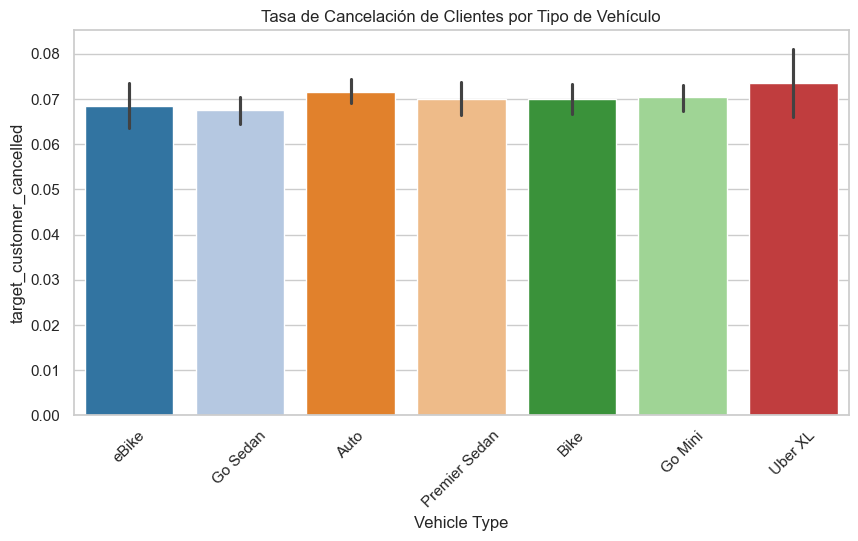

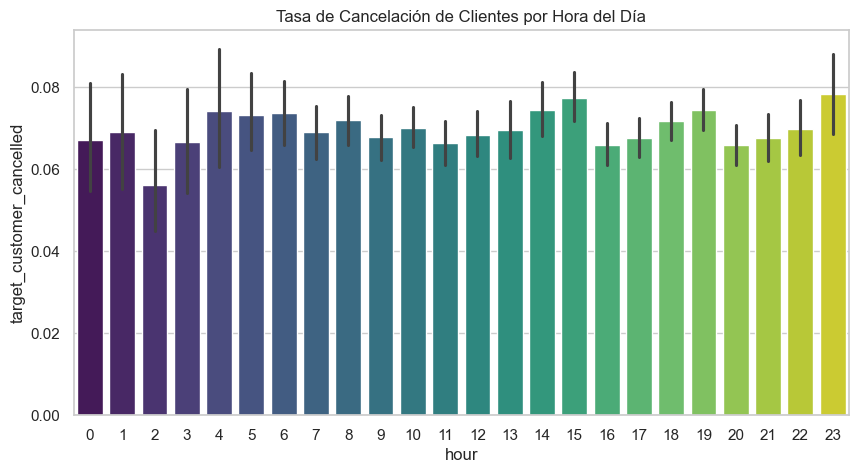

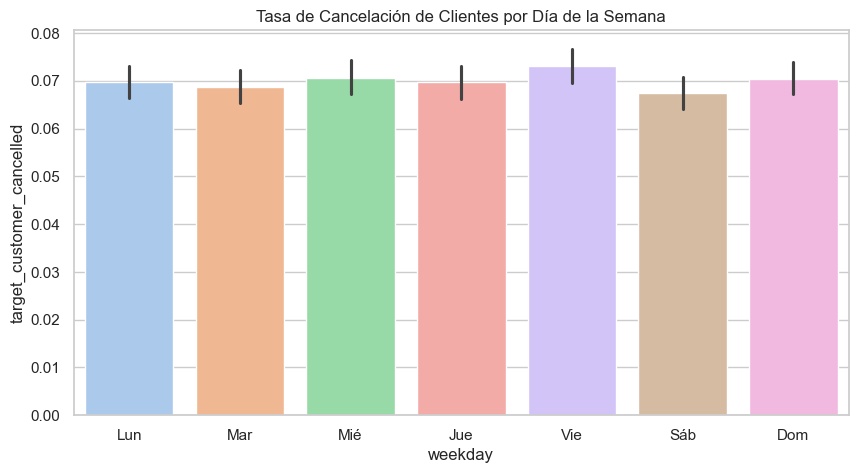

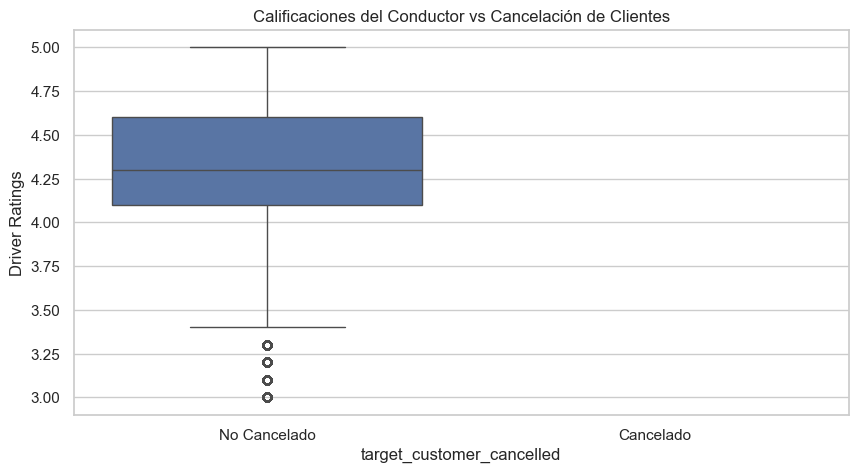

In [11]:


# Configurar estilo
sns.set(style="whitegrid")

# 1. Tasa de cancelación por tipo de vehículo
plt.figure(figsize=(10, 5))
sns.barplot(
    data=df, 
    x='Vehicle Type', 
    y='target_customer_cancelled', 
    hue='Vehicle Type',       # hue asignado para paleta
    dodge=False,              # mantener barras juntas
    palette=sns.color_palette("tab20", n_colors=df['Vehicle Type'].nunique()),
    legend=False
)
plt.title("Tasa de Cancelación de Clientes por Tipo de Vehículo")
plt.xticks(rotation=45)
plt.show()

# 2. Tasa de cancelación por hora del día
plt.figure(figsize=(10, 5))
sns.barplot(
    data=df, 
    x='hour', 
    y='target_customer_cancelled', 
    hue='hour', 
    dodge=False,
    palette=sns.color_palette("viridis", n_colors=df['hour'].nunique()),
    legend=False
)
plt.title("Tasa de Cancelación de Clientes por Hora del Día")
plt.show()

# 3. Tasa de cancelación por día de la semana
plt.figure(figsize=(10, 5))
sns.barplot(
    data=df, 
    x='weekday', 
    y='target_customer_cancelled', 
    hue='weekday', 
    dodge=False,
    palette=sns.color_palette("pastel", n_colors=df['weekday'].nunique()),
    legend=False
)
plt.title("Tasa de Cancelación de Clientes por Día de la Semana")
plt.xticks(ticks=range(7), labels=["Lun", "Mar", "Mié", "Jue", "Vie", "Sáb", "Dom"])
plt.show()

# 4. Calificación del conductor vs cancelación
# Usando hue para evitar warning en boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df, 
    x='target_customer_cancelled', 
    y='Driver Ratings',
    hue='target_customer_cancelled',    # hue asignado
    dodge=False,
    palette=["#4c72b0", "#dd8452"],     # Colores para 0 y 1
    legend=False
)
plt.title("Calificaciones del Conductor vs Cancelación de Clientes")
plt.xticks([0, 1], ['No Cancelado', 'Cancelado'])
plt.show()


### Hubicación y Hora  

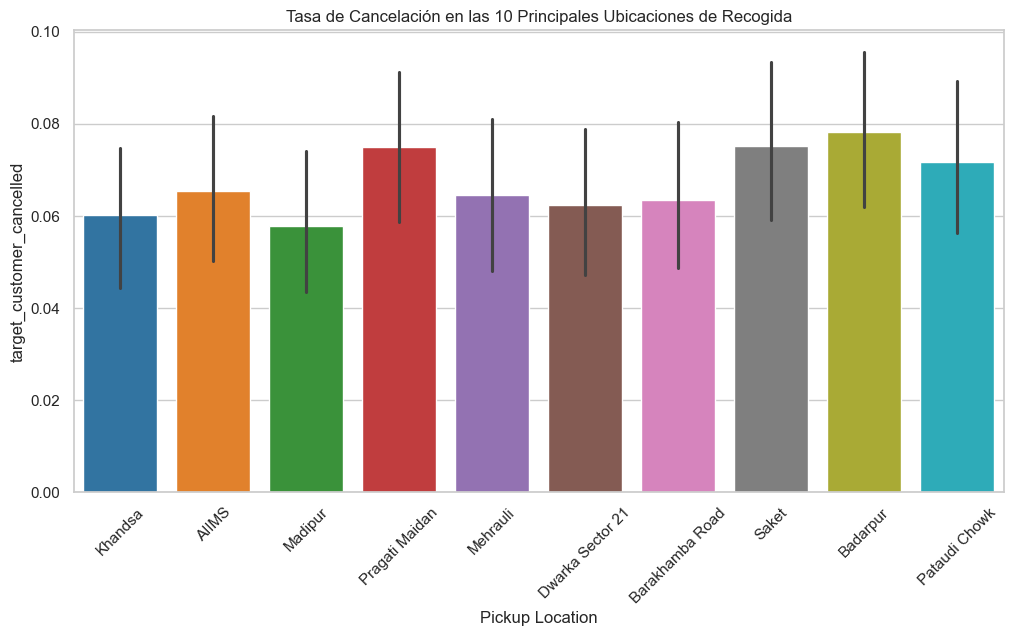

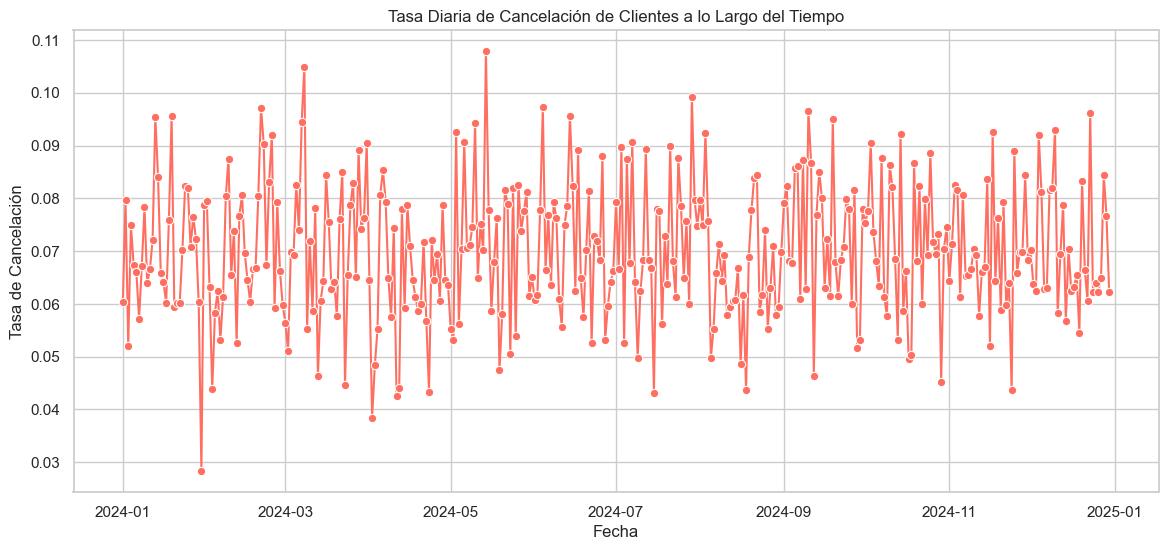

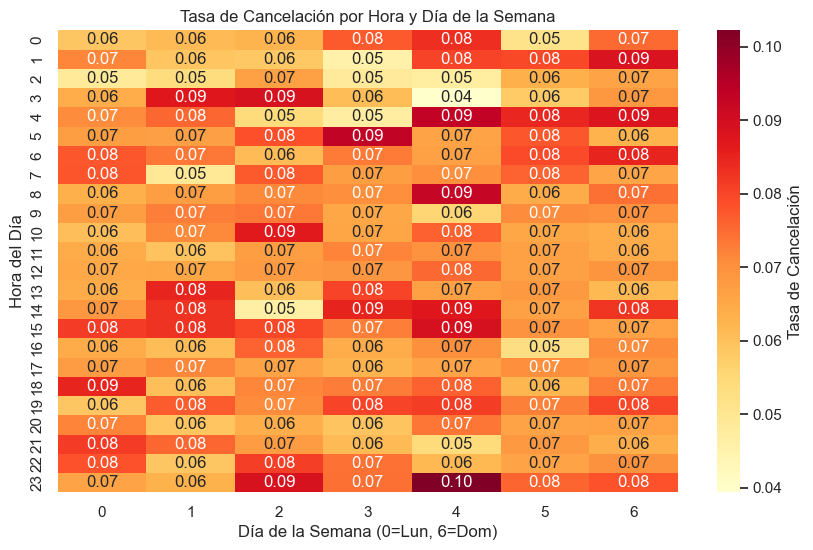

In [12]:
# 1. Top 10 ubicaciones de recogida por cantidad
top_pickups = df['Pickup Location'].value_counts().nlargest(10).index
df_top_pickups = df[df['Pickup Location'].isin(top_pickups)]

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_top_pickups, 
    x='Pickup Location', 
    y='target_customer_cancelled',
    hue='Pickup Location',                # Hue asignado para paleta
    dodge=False,
    palette=sns.color_palette("tab10", n_colors=df_top_pickups['Pickup Location'].nunique()),
    legend=False
)
plt.title("Tasa de Cancelación en las 10 Principales Ubicaciones de Recogida")
plt.xticks(rotation=45)
plt.show()

# 2. Tendencia de cancelaciones a lo largo del tiempo (diaria)
df_daily = df.groupby('Date')['target_customer_cancelled'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=df_daily, 
    x='Date', 
    y='target_customer_cancelled',
    color="#ff6f61",                      # Color llamativo
    marker="o"
)
plt.title("Tasa Diaria de Cancelación de Clientes a lo Largo del Tiempo")
plt.ylabel("Tasa de Cancelación")
plt.xlabel("Fecha")
plt.show()

# 3. Mapa de calor de hora vs día de la semana
heatmap_data = df.pivot_table(
    index='hour',
    columns='weekday',
    values='target_customer_cancelled',
    aggfunc='mean'
)

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data, 
    cmap="YlOrRd",                       # Paleta más llamativa
    annot=True, 
    fmt=".2f",
    cbar_kws={'label': 'Tasa de Cancelación'}
)
plt.title("Tasa de Cancelación por Hora y Día de la Semana")
plt.ylabel("Hora del Día")
plt.xlabel("Día de la Semana (0=Lun, 6=Dom)")
plt.show()

### Feature Engineering

In [13]:
## 1. Codificación One-Hot para Tipo de Vehículo
df = pd.get_dummies(df, columns=['Vehicle Type'], prefix='vehicle', drop_first=True)

# 2. Codificar las 10 principales ubicaciones de recogida
top_pickups = df['Pickup Location'].value_counts().nlargest(10).index
df['pickup_encoded'] = df['Pickup Location'].apply(lambda x: x if x in top_pickups else 'Other')
df = pd.get_dummies(df, columns=['pickup_encoded'], prefix='pickup', drop_first=True)

# 3. Codificar las 10 principales ubicaciones de destino
top_drops = df['Drop Location'].value_counts().nlargest(10).index
df['drop_encoded'] = df['Drop Location'].apply(lambda x: x if x in top_drops else 'Other')
df = pd.get_dummies(df, columns=['drop_encoded'], prefix='drop', drop_first=True)

# 4. Frecuencia de reservas por cliente
cust_counts = df['Customer ID'].value_counts().to_dict()
df['customer_total_bookings'] = df['Customer ID'].map(cust_counts)

# 5. Reemplazar NaNs en columnas numéricas con un valor placeholder o dejarlas como están
# (Dejar que los modelos de árboles manejen los valores faltantes)
num_cols = ['Avg VTAT', 'Avg CTAT', 'Driver Ratings', 'Customer Rating']
# df[num_cols] = df[num_cols].fillna(-1)

# 6. Eliminar columnas que no se necesitan para el modelado
drop_cols = [
    'Booking ID', 'Customer ID', 'Pickup Location', 'Drop Location',
    'Cancelled Rides by Customer', 'Reason for cancelling by Customer',
    'Cancelled Rides by Driver', 'Driver Cancellation Reason',
    'Incomplete Rides', 'Incomplete Rides Reason', 'Date', 'Time', 'datetime'
]
df.drop(columns=drop_cols, inplace=True)

# 7. Lista final de características
features = [col for col in df.columns if col != 'target_customer_cancelled']
target = 'target_customer_cancelled'

print(f" Total de características para modelado: {len(features)}")


 Total de características para modelado: 47


### Pesos de clase balanceados

In [14]:
# Calcular pesos de clase usando sklearn
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array([0, 1]),   # <-- convertir a numpy array
    y=df['target_customer_cancelled']
)

weights = dict(enumerate(class_weights))
print("Pesos de clase:", weights)

Pesos de clase: {0: np.float64(0.5376344086021505), 1: np.float64(7.142857142857143)}


In [15]:
# Combinar X e y temporalmente
temp_df = df.copy()
temp_df['target'] = df[target]

# Seleccionar solo las columnas numéricas
numeric_cols = temp_df.select_dtypes(include=[np.number]).columns

# Calcular correlación con la variable objetivo
correlations = temp_df[numeric_cols].corr()['target'].sort_values(key=abs, ascending=False)

# Mostrar las características más correlacionadas (excluyendo la variable objetivo)
print(" Características más correlacionadas con la variable objetivo:\n")
print(correlations.drop('target'))


 Características más correlacionadas con la variable objetivo:

target_customer_cancelled    1.000000
Avg VTAT                     0.306592
Avg CTAT                    -0.008883
month                        0.001480
hour                         0.001475
customer_total_bookings      0.001330
day                         -0.000854
weekday                      0.000595
Booking Value                     NaN
Ride Distance                     NaN
Driver Ratings                    NaN
Customer Rating                   NaN
Name: target, dtype: float64


### Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.impute import SimpleImputer

# Define cleaned features
leaky_features = [
    'Avg VTAT', 'Ride Distance',
    'Booking Value', 'Customer Rating', 'Driver Ratings',
    'Booking Status', 'Payment Method',
    'missing_booking_value', 'missing_payment_method',
    'missing_driver_rating', 'missing_customer_rating',
    'is_cancelled_customer', 'is_cancelled_driver', 'is_incomplete'
]
clean_features = [f for f in features if f not in leaky_features]

# Prepare data
X = df[clean_features]
y = df['target_customer_cancelled']

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, stratify=y, random_state=42
)

# Train Random Forest with balanced class weights
rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Predict & Evaluate
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

print(" ROC AUC Score:", roc_auc_score(y_test, y_prob))
print(" Classification Report:\n", classification_report(y_test, y_pred, digits=3))

 ROC AUC Score: 0.8462628349547704
 Classification Report:
               precision    recall  f1-score   support

           0      0.941     0.951     0.946     27900
           1      0.237     0.200     0.217      2100

    accuracy                          0.899     30000
   macro avg      0.589     0.576     0.582     30000
weighted avg      0.891     0.899     0.895     30000



In [17]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_auc_score

# Clean feature set (reuse from Random Forest)
leaky_features = [
    'Avg VTAT', 'Ride Distance',
    'Booking Value', 'Customer Rating', 'Driver Ratings',
    'Booking Status', 'Payment Method',
    'missing_booking_value', 'missing_payment_method',
    'missing_driver_rating', 'missing_customer_rating',
    'is_cancelled_customer', 'is_cancelled_driver', 'is_incomplete'
]
clean_features = [f for f in features if f not in leaky_features]

X = df[clean_features]
y = df['target_customer_cancelled']

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, stratify=y, random_state=42
)

# Train XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    scale_pos_weight=13.29,
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

print(" ROC AUC Score:", roc_auc_score(y_test, y_prob))
print("\n Classification Report:\n", classification_report(y_test, y_pred, digits=3))

 ROC AUC Score: 0.8645445041816009

 Classification Report:
               precision    recall  f1-score   support

           0      0.993     0.747     0.853     27900
           1      0.218     0.935     0.353      2100

    accuracy                          0.760     30000
   macro avg      0.606     0.841     0.603     30000
weighted avg      0.939     0.760     0.818     30000



c:\Users\borja\anaconda3\envs\data_basic\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:29:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
